# Predictive Analysis Using Machine Learning

## Objective
Build a machine learning model to predict outcomes based on a dataset.

## Workflow
1. Data Loading
2. Data Preprocessing
3. Feature Selection
4. Model Training
5. Model Evaluation


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Load dataset directly from online source
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

df = pd.read_csv(url, names=columns)

# Display first 5 rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Shape of dataset
print("Dataset Shape:", df.shape)

# Check data types
df.info()

# Statistical summary
df.describe()


Dataset Shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Feature and Target Selection
We separate the independent variables (features) and dependent variable (target).


In [5]:
# Features (Independent variables)
X = df.drop("Outcome", axis=1)

# Target (Dependent variable)
y = df["Outcome"]

print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)


Feature Shape: (768, 8)
Target Shape: (768,)


## Feature Scaling
Standardizing the features using StandardScaler.


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easy handling
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


## Feature Selection
Selecting the top important features using SelectKBest.


In [7]:
# Select top 5 features based on statistical test
selector = SelectKBest(score_func=f_classif, k=5)

X_selected = selector.fit_transform(X_scaled, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))

# Convert to DataFrame
X_selected = pd.DataFrame(X_selected, columns=selected_features)
X_selected.head()


Selected Features: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,1.409746,5.484909,-0.020496


## Train-Test Split
Splitting data into training and testing sets.


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (614, 5)
Testing Data Shape: (154, 5)


## Model Training
Training a Logistic Regression model on the selected features.


In [9]:
# Create model
model = LogisticRegression()

# Train model
model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


## Model Prediction
Predicting outcomes on the test dataset.


In [10]:
# Predict on test data
y_pred = model.predict(X_test)

# Show first few predictions
print("Predicted values:", y_pred[:10])
print("Actual values:   ", y_test.values[:10])


Predicted values: [0 0 0 0 1 0 0 0 1 1]
Actual values:    [0 0 0 0 0 0 0 0 0 0]


## Model Evaluation
Evaluating the model using Accuracy, Confusion Matrix, and Classification Report.


In [11]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")


Model Accuracy: 75.32 %


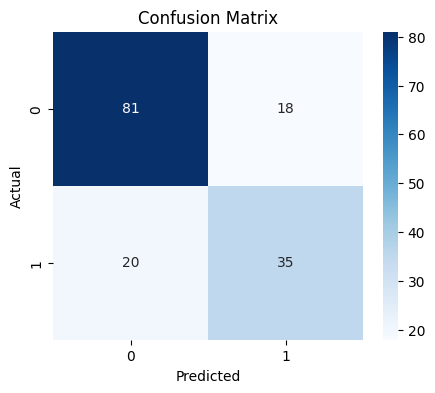

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [13]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



## Model Improvement: Random Forest
Training a Random Forest model and comparing its performance with Logistic Regression.


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", round(rf_accuracy * 100, 2), "%")


Random Forest Accuracy: 77.27 %


## Model Comparison
Comparing the performance of Logistic Regression and Random Forest.


In [15]:
lr_accuracy = accuracy_score(y_test, y_pred)

print("Logistic Regression Accuracy:", round(lr_accuracy * 100, 2), "%")
print("Random Forest Accuracy:", round(rf_accuracy * 100, 2), "%")


Logistic Regression Accuracy: 75.32 %
Random Forest Accuracy: 77.27 %


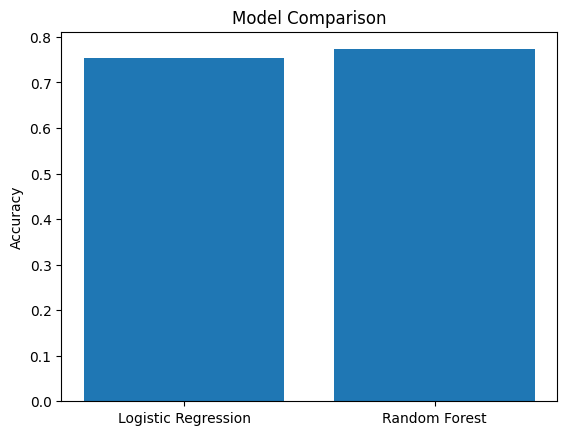

In [16]:
models = ['Logistic Regression', 'Random Forest']
scores = [lr_accuracy, rf_accuracy]

plt.bar(models, scores)
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.show()


## Feature Importance (Random Forest)
Understanding which features contribute most to the prediction.


In [17]:
importances = rf_model.feature_importances_
feature_names = X_selected.columns

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
1,Glucose,0.314151
2,BMI,0.232937
4,Age,0.187913
3,DiabetesPedigreeFunction,0.172789
0,Pregnancies,0.092210


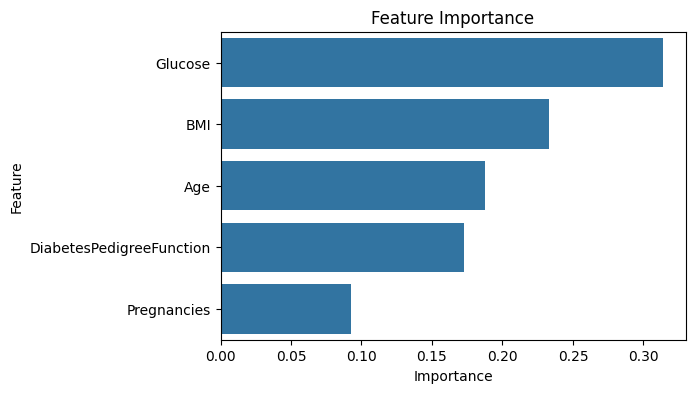

In [18]:
plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance")
plt.show()


## Final Insights

- Data preprocessing and feature scaling were performed.
- Feature selection reduced the dataset to the most relevant features.
- Logistic Regression achieved an accuracy of 75.32%.
- Random Forest improved the performance and achieved an accuracy of 77.27%.
- The improvement shows that ensemble methods can capture complex patterns better.
- Feature importance analysis helped identify the most influential factors.

This project demonstrates a complete machine learning pipeline including preprocessing, feature selection, model comparison, and model interpretation.
